# Covid-19 Stats
## Análise dos dados

### Imports

In [14]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Dados por regiões de saúde

In [15]:
dados_por_regiao_de_saude = pd.read_json('https://xx9p7hp1p7.execute-api.us-east-1.amazonaws.com/prod/PortalRegiaoSaude')
dados_por_regiao_de_saude.head()

,_id,nome,cod,casosAcumulado,obitosAcumulado,incidencia,incidenciaObito
0,SAO PAULO,SAO PAULO,35016,206102,9806,1682.0,80.0
1,DISTRITO FEDERAL,DISTRITO FEDERAL,53001,115966,1572,3845.0,52.0
2,METROPOLITANA I,METROPOLITANA I,33005,73396,8499,16214.0,1133.0
3,SALVADOR,SALVADOR,29020,59556,1891,NaN,NaN
4,1ª REGIAO FORTALEZA,1ª REGIAO FORTALEZA,23001,42601,3722,7262.0,373.0


In [16]:
dados_por_regiao_de_saude.shape

(436, 7)

### Dados dos casos diários/semanais do Brasil

In [17]:
dados_brasil_json = requests.get('https://xx9p7hp1p7.execute-api.us-east-1.amazonaws.com/prod/PortalCasos').json()
dados_brasil_por_semana = dados_brasil_json['semana']
dados_brasil_por_dia = dados_brasil_json['dias']

In [18]:
dados_de_casos_diarios = pd.DataFrame.from_dict(dados_brasil_por_dia)
print(dados_de_casos_diarios.shape)
dados_de_casos_diarios.columns = ['Data', 'Casos Acumulados', 'Óbitos Acumulados', 'Casos Novos', 'Óbitos Novos']
dados_de_casos_diarios.head(-5)

(162, 5)


,Data,Casos Acumulados,Óbitos Acumulados,Casos Novos,Óbitos Novos
0,26/02,1,0,0,0
1,27/02,1,0,0,0
2,28/02,1,0,0,0
3,29/02,2,0,1,0
4,01/03,2,0,0,0
...,...,...,...,...,...
152,27/07,2442375,87618,23284,614
153,28/07,2483191,88539,40816,921
154,29/07,2552265,90134,69074,1595
155,30/07,2610102,91263,57837,1129


### Gráfico com dados dos casos no Brasil

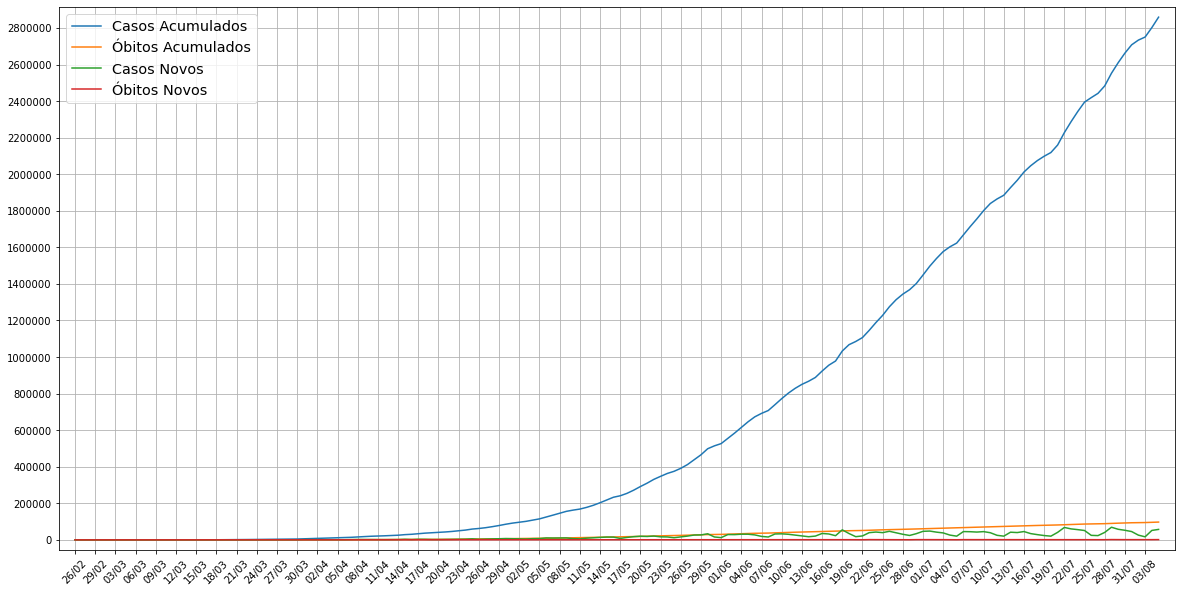

In [19]:
fig = plt.figure(figsize=(20,10))
plt.plot('Data', 'Casos Acumulados', data=dados_de_casos_diarios, label='Casos Acumulados')
plt.plot('Data', 'Óbitos Acumulados', data=dados_de_casos_diarios, label='Óbitos Acumulados')
plt.plot('Data', 'Casos Novos', data=dados_de_casos_diarios, label='Casos Novos')
plt.plot('Data', 'Óbitos Novos', data=dados_de_casos_diarios, label='Óbitos Novos')
plt.grid()
plt.margins(0.015, 0.02)
plt.legend(fontsize='x-large')
plt.xticks(np.arange(0, len(dados_de_casos_diarios), 3), rotation=45)
plt.yticks(np.arange(0, dados_de_casos_diarios['Casos Acumulados'].max(), 200000))
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Dados dos casos diários/semanais por regiões

In [20]:
dados_regioes_json = requests.get('https://xx9p7hp1p7.execute-api.us-east-1.amazonaws.com/prod/PortalRegiaoUf').json()
# estados_sudeste = [estado for estado in dados_regioes_json['Sudeste']]
# estados_norte = [estado for estado in dados_regioes_json['Sudeste']]
# estados_nordeste = [estado for estado in dados_regioes_json['Nordeste']]
# estados_sul = [estado for estado in dados_regioes_json['Sul']]
# estados_centro_oeste = [estado for estado in dados_regioes_json['Centro-Oeste']]
regioes = ['Sudeste', 'Sudeste', 'Nordeste', 'Sul', 'Centro-Oeste', 'Norte']
print(regioes)

['Sudeste', 'Sudeste', 'Nordeste', 'Sul', 'Centro-Oeste', 'Norte']


In [21]:
estados = dict()
for regiao in regioes:
    estados[regiao] = [estado for estado in dados_regioes_json[regiao]]

estados

{'Sudeste': ['SP', 'RJ', 'MG', 'ES'],
 'Nordeste': ['CE', 'BA', 'MA', 'PE', 'PB', 'AL', 'SE', 'PI', 'RN'],
 'Sul': ['SC', 'PR', 'RS'],
 'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
 'Norte': ['PA', 'AM', 'RO', 'AP', 'RR', 'TO', 'AC']}

In [22]:
dataframe_de_estados = dict()
for regiao in regioes:
    for estado in estados[regiao]:
        dataframe_de_estados[estado] = pd.DataFrame.from_dict(dados_regioes_json[regiao][estado]['dias'])
        dataframe_de_estados[estado].columns = ['Data', 'Casos Acumulados', 'Óbitos Acumulados']
        dataframe_de_estados[estado]['Casos Novos'] = dataframe_de_estados[estado]['Casos Acumulados'].diff().fillna(dataframe_de_estados[estado]['Casos Acumulados'])
        dataframe_de_estados[estado]['Óbitos Novos'] = dataframe_de_estados[estado]['Óbitos Acumulados'].diff().fillna(dataframe_de_estados[estado]['Óbitos Acumulados'])
        # dataframe_de_estados[estado]['Casos Novos'] = dataframe_de_estados[estado]['Casos Acumulados']

#### Exemplo de casos no estado Rio de Janeiro

In [23]:
dataframe_de_estados['RJ'].tail(10)

,Data,Casos Acumulados,Óbitos Acumulados,Casos Novos,Óbitos Novos
152,27/07,157834,12876,1509.0,41.0
153,28/07,159639,13033,1805.0,157.0
154,29/07,161647,13198,2008.0,165.0
155,30/07,163642,13348,1995.0,150.0
156,31/07,165495,13477,1853.0,129.0
157,01/08,167213,13556,1718.0,79.0
158,02/08,167225,13572,12.0,16.0
159,03/08,168064,13604,839.0,32.0
160,04/08,168911,13715,847.0,111.0
161,05/08,172679,13855,3768.0,140.0


#### Número de casos novos no Rio De Janeiro

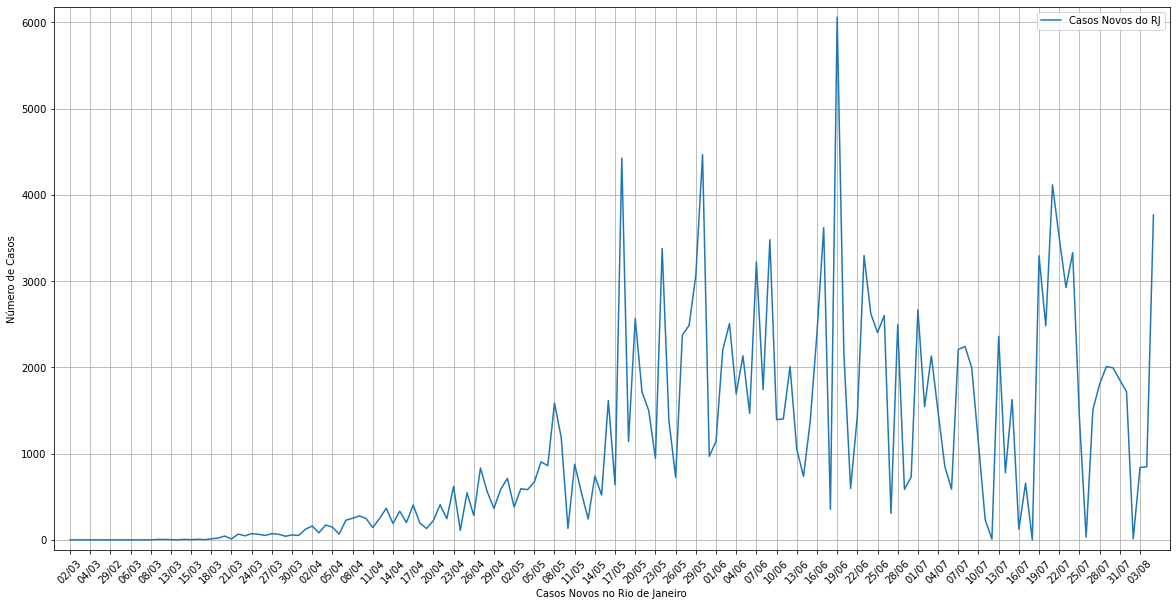

In [24]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.grid()
plt.xlabel("Casos Novos no Rio de Janeiro")
plt.ylabel("Número de Casos")
plt.margins(0.015, 0.02)
plt.plot('Data', 'Casos Novos', data=dataframe_de_estados['RJ'], label='Casos Novos do RJ')
plt.legend()
plt.xticks(np.arange(0, len(dados_de_casos_diarios), 3), rotation=45)
plt.yticks(np.arange(0, dataframe_de_estados['RJ']['Casos Novos'].max(), 1000))
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Número de casos acumulados no Rio de Janeiro

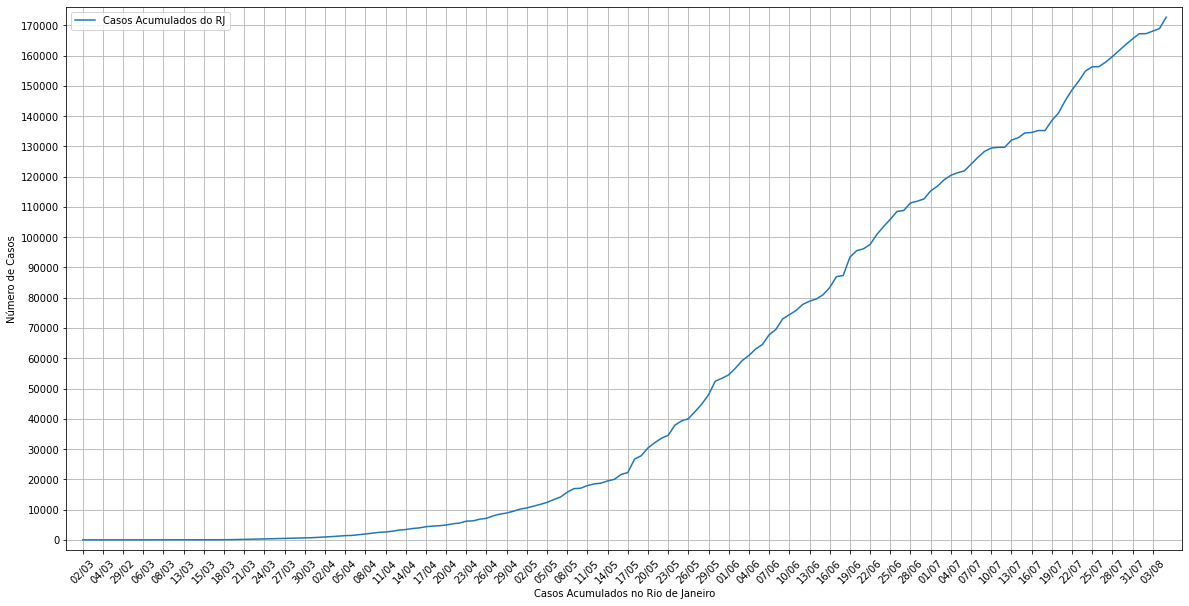

In [25]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.grid()
plt.xlabel("Casos Acumulados no Rio de Janeiro")
plt.ylabel("Número de Casos")
plt.margins(0.015, 0.02)
plt.plot('Data', 'Casos Acumulados', data=dataframe_de_estados['RJ'], label='Casos Acumulados do RJ')
plt.legend()
plt.xticks(np.arange(0, len(dados_de_casos_diarios), 3), rotation=45)
plt.yticks(np.arange(0, dataframe_de_estados['RJ']['Casos Acumulados'].max(), 10000))
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Gráfico com os casos acumulados de alguns estados

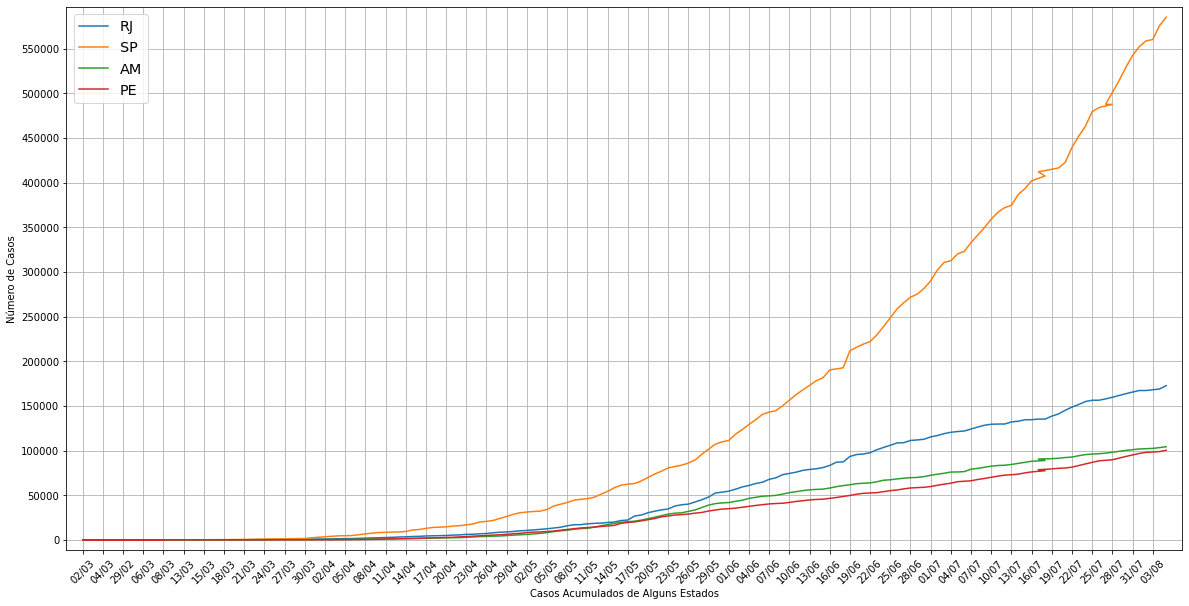

In [26]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.grid()
plt.xlabel("Casos Acumulados de Alguns Estados")
plt.ylabel("Número de Casos")
plt.margins(0.015, 0.02)
plt.plot('Data', 'Casos Acumulados', data=dataframe_de_estados['RJ'], label='RJ')
plt.plot('Data', 'Casos Acumulados', data=dataframe_de_estados['SP'], label='SP')
plt.plot('Data', 'Casos Acumulados', data=dataframe_de_estados['AM'], label='AM')
plt.plot('Data', 'Casos Acumulados', data=dataframe_de_estados['PE'], label='PE')
plt.legend(fontsize='x-large')
plt.xticks(np.arange(0, len(dados_de_casos_diarios), 3), rotation=45)
plt.yticks(np.arange(0, 600000, 50000))
plt.ticklabel_format(style='plain', axis='y')
plt.show()